In [1]:
!pip install --upgrade pip
!pip install pandas numpy scikit-learn scipy graphviz shap matplotlib tensorflow

  Using cached pip-24.0-py3-none-any.whl (2.1 MB)


ERROR: To modify pip, please run the following command:
c:\Users\sebastian.pitur\Documents\mobemu\.venv\Scripts\python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/376.9 MB ? eta -:--:--
     ---------------------------------------- 0.0/376.9 MB 1.4 MB/s eta 0:04:37
     ---------------------------------------- 0.1/376.9 MB 1.3 MB/s eta 0:04:48
     ---------------------------------------- 0.2/376.9 MB 1.9 MB/s eta 0:03:20
     ---------------------------------------- 0.4/376.9 MB 2.0 MB/s eta 0:03:07
     ---------------------------------------- 0.5/376.9 MB 2.2 MB/s eta 0:02:53
     ---------------------------------------- 0.8/376.9 MB 2.7 MB/s eta 0:02:22
     ---------------------------------------- 1.0/376.9 MB 2.9 MB/s eta 0:02:10
     ---------------------------------------- 1.2/376.9 MB 3.3 MB/s eta 0:01:55
     ---------------------------------------- 1.2/376.9 MB 3.0 MB/s eta 0:02:06
     ---------------------------------------- 1.5/376.9 MB 3.3 MB/s eta 0:01:53
     ---------------------------------------- 1.6/376.9 MB 3.1 MB/s eta 0:02:03
     ---------------------------------------- 1


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Data Processing
import pandas as pd
import numpy as np

from shap import TreeExplainer
from shap import summary_plot
import shap.plots
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV, train_test_split
from scipy.stats import randint
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn import svm

import matplotlib.pyplot as plt

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

c:\Users\sebastian.pitur\Documents\mobemu\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:

# fraction = 0.25

# sampled_chunks = []
# chunk_size = 1000000

# for i, chunk in enumerate(pd.read_csv('traces/upb-hyccups2012/upb2012.csv', chunksize=chunk_size)):
#     if i > 3:
#         break
#     # Sample a fraction of rows from each chunk
#     sampled_chunk = chunk.sample(frac=fraction, random_state=1)
#     sampled_chunks.append(sampled_chunk)
# df = pd.concat(sampled_chunks, ignore_index=True)


df = pd.read_csv("traces/upb-hyccups2012/upb2012.csv", nrows=50000)

In [4]:
df

,messageId,messageSource,messageHopCount,oldRelayId,oldFriendWithDestination,oldRelayBattery,oldCommonCommunity,oldDataMemory,newRelayId,newFriendWithDestination,newRelayBattery,newCommonCommunity,newDataMemory
0,0,0,1,5,0,0.333218,0,0.045,0,0,0.730968,0,0.000
1,1,0,1,5,0,0.333218,0,0.045,0,0,0.730968,0,0.000
2,2,0,1,5,0,0.333218,0,0.045,0,0,0.730968,0,0.000
3,3,0,1,5,0,0.333218,0,0.045,0,0,0.730968,0,0.000
4,4,0,1,5,0,0.333218,0,0.045,0,0,0.730968,0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1281,5,2,0,0,0.730968,0,0.286,2,0,0.637417,0,0.222
49996,1282,5,2,0,0,0.730968,0,0.286,2,0,0.637417,0,0.222
49997,1283,5,2,0,0,0.730968,0,0.286,2,0,0.637417,0,0.222
49998,1284,5,2,0,0,0.730968,0,0.286,2,0,0.637417,0,0.222


In [5]:
successful_messages = pd.read_csv("traces/upb-hyccups2012/successful2012.csv", nrows=10000)

In [6]:
successful_messages

,messageId,lastRelay,destination
0,14,5,0
1,579,5,0
2,595,5,0
3,604,6,1
4,1176,6,1
...,...,...,...
9995,1797,4,0
9996,1798,4,0
9997,1291,4,0
9998,1864,4,0


In [7]:
df["usefulTransfer"] = np.NaN
df

,messageId,messageSource,messageHopCount,oldRelayId,oldFriendWithDestination,oldRelayBattery,oldCommonCommunity,oldDataMemory,newRelayId,newFriendWithDestination,newRelayBattery,newCommonCommunity,newDataMemory,usefulTransfer
0,0,0,1,5,0,0.333218,0,0.045,0,0,0.730968,0,0.000,NaN
1,1,0,1,5,0,0.333218,0,0.045,0,0,0.730968,0,0.000,NaN
2,2,0,1,5,0,0.333218,0,0.045,0,0,0.730968,0,0.000,NaN
3,3,0,1,5,0,0.333218,0,0.045,0,0,0.730968,0,0.000,NaN
4,4,0,1,5,0,0.333218,0,0.045,0,0,0.730968,0,0.000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1281,5,2,0,0,0.730968,0,0.286,2,0,0.637417,0,0.222,NaN
49996,1282,5,2,0,0,0.730968,0,0.286,2,0,0.637417,0,0.222,NaN
49997,1283,5,2,0,0,0.730968,0,0.286,2,0,0.637417,0,0.222,NaN
49998,1284,5,2,0,0,0.730968,0,0.286,2,0,0.637417,0,0.222,NaN


In [8]:
# make sure column is integer not float
df["usefulTransfer"] = pd.Series(dtype=np.int64)

for index, row in successful_messages.iterrows():
  message_id = row.iloc[0]
  last_relay = row.iloc[1]
  destination = row.iloc[2]

  reached_source = False
  queue = df[(df['messageId'] == message_id) & (df['newRelayId'] == last_relay)].index.tolist()
  visited = []
  while (True):
    if (len(queue) == 0):
       break

    curr_idx = queue.pop()
    visited.append(curr_idx)

    df_row = df.iloc[curr_idx]
    message_source = df_row.iloc[1]
    old_relay_id = df_row.iloc[3]

    if old_relay_id == message_source:
        break

    df.loc[curr_idx, "usefulTransfer"] = 1
    last_relay = old_relay_id


    for idx in df[(df['messageId'] == message_id) & (df['newRelayId'] == last_relay)].index.tolist():
       if (idx not in visited):
         queue.insert(0, idx)

df.loc[(df['usefulTransfer'] != 1), 'usefulTransfer'] = 0
df = df.drop(columns=['messageId', 'oldRelayId', 'newRelayId', 'messageSource'])
df['usefulTransfer'].value_counts()[1]


2663

In [9]:
df.to_csv('traces/upb-hyccups2012/with_result.csv', index=False)


In [10]:
positive_df = df.loc[df['usefulTransfer'] == 1]
negative_df = df.loc[df['usefulTransfer'] == 0].sample(len(positive_df))
balanced_df = pd.concat([positive_df, negative_df], ignore_index=True)
print(balanced_df.min())
print(balanced_df.max())
balanced_df

messageHopCount             0.000000
oldFriendWithDestination    0.000000
oldRelayBattery             0.128897
oldCommonCommunity          0.000000
oldDataMemory               0.047000
newFriendWithDestination    0.000000
newRelayBattery             0.128897
newCommonCommunity          0.000000
newDataMemory               0.000000
usefulTransfer              0.000000
dtype: float64
messageHopCount             6.000000
oldFriendWithDestination    1.000000
oldRelayBattery             0.964487
oldCommonCommunity          1.000000
oldDataMemory               0.808000
newFriendWithDestination    1.000000
newRelayBattery             0.984842
newCommonCommunity          1.000000
newDataMemory               0.813000
usefulTransfer              1.000000
dtype: float64


,messageHopCount,oldFriendWithDestination,oldRelayBattery,oldCommonCommunity,oldDataMemory,newFriendWithDestination,newRelayBattery,newCommonCommunity,newDataMemory,usefulTransfer
0,0,0,0.730968,1,0.047,1,0.637417,0,0.001,1.0
1,0,0,0.730968,1,0.047,1,0.637417,0,0.009,1.0
2,0,0,0.730968,1,0.047,1,0.637417,0,0.019,1.0
3,2,0,0.730968,0,0.047,0,0.637417,0,0.041,1.0
4,2,0,0.637417,0,0.108,0,0.730968,0,0.047,1.0
...,...,...,...,...,...,...,...,...,...,...
5321,3,0,0.879183,0,0.808,0,0.625146,0,0.810,0.0
5322,2,0,0.730968,0,0.213,0,0.333218,0,0.158,0.0
5323,1,1,0.240536,1,0.579,0,0.385189,0,0.578,0.0
5324,4,0,0.240536,0,0.438,0,0.240536,0,0.438,0.0


In [11]:
balanced_df['messageHopCount']

0       0
1       0
2       0
3       2
4       2
       ..
5321    3
5322    2
5323    1
5324    4
5325    1
Name: messageHopCount, Length: 5326, dtype: int64

In [12]:
# add preprocessing
min_max_scaler = MinMaxScaler((0,1))
preprocessed_df = balanced_df.copy()

result_df = pd.DataFrame(balanced_df['usefulTransfer'].copy())
one_hot_encoder = LabelEncoder()
encoded = one_hot_encoder.fit_transform(result_df)
result_df = pd.DataFrame(encoded, columns=['usefulTransfer'])

preprocessed_df = preprocessed_df.drop(columns=['usefulTransfer'])
columns = preprocessed_df.columns
indices = preprocessed_df.index
preprocessed_df['messageHopCount'] = min_max_scaler.fit_transform(preprocessed_df['messageHopCount'].values.reshape(-1,1))
standard_scaler = StandardScaler()
preprocessed_df = standard_scaler.fit_transform(preprocessed_df)
preprocessed_df = pd.DataFrame(preprocessed_df, indices, columns)
preprocessed_df


c:\Users\sebastian.pitur\Documents\mobemu\.venv\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,messageHopCount,oldFriendWithDestination,oldRelayBattery,oldCommonCommunity,oldDataMemory,newFriendWithDestination,newRelayBattery,newCommonCommunity,newDataMemory
0,-1.389780,-0.679988,1.261844,2.036147,-1.787154,1.299961,1.067305,-0.310017,-1.894578
1,-1.389780,-0.679988,1.261844,2.036147,-1.787154,1.299961,1.067305,-0.310017,-1.857305
2,-1.389780,-0.679988,1.261844,2.036147,-1.787154,1.299961,1.067305,-0.310017,-1.810714
3,-0.285173,-0.679988,1.261844,-0.491124,-1.787154,-0.769254,1.067305,-0.310017,-1.708213
4,-0.285173,-0.679988,0.869042,-0.491124,-1.495537,-0.769254,1.506452,-0.310017,-1.680258
...,...,...,...,...,...,...,...,...,...
5321,0.267130,-0.679988,1.884172,-0.491124,1.850887,-0.769254,1.009702,-0.310017,1.874665
5322,-0.285173,-0.679988,1.261844,-0.491124,-0.993573,-0.769254,-0.360677,-0.310017,-1.163094
5323,-0.837476,1.470615,-0.797395,2.036147,0.756128,-0.769254,-0.116714,-0.310017,0.793745
5324,0.819433,-0.679988,-0.797395,-0.491124,0.082063,-0.769254,-0.795748,-0.310017,0.141465


In [13]:
result_df

,usefulTransfer
0,1
1,1
2,1
3,1
4,1
...,...
5321,0
5322,0
5323,0
5324,0


In [14]:
preprocessed_df

,messageHopCount,oldFriendWithDestination,oldRelayBattery,oldCommonCommunity,oldDataMemory,newFriendWithDestination,newRelayBattery,newCommonCommunity,newDataMemory
0,-1.389780,-0.679988,1.261844,2.036147,-1.787154,1.299961,1.067305,-0.310017,-1.894578
1,-1.389780,-0.679988,1.261844,2.036147,-1.787154,1.299961,1.067305,-0.310017,-1.857305
2,-1.389780,-0.679988,1.261844,2.036147,-1.787154,1.299961,1.067305,-0.310017,-1.810714
3,-0.285173,-0.679988,1.261844,-0.491124,-1.787154,-0.769254,1.067305,-0.310017,-1.708213
4,-0.285173,-0.679988,0.869042,-0.491124,-1.495537,-0.769254,1.506452,-0.310017,-1.680258
...,...,...,...,...,...,...,...,...,...
5321,0.267130,-0.679988,1.884172,-0.491124,1.850887,-0.769254,1.009702,-0.310017,1.874665
5322,-0.285173,-0.679988,1.261844,-0.491124,-0.993573,-0.769254,-0.360677,-0.310017,-1.163094
5323,-0.837476,1.470615,-0.797395,2.036147,0.756128,-0.769254,-0.116714,-0.310017,0.793745
5324,0.819433,-0.679988,-0.797395,-0.491124,0.082063,-0.769254,-0.795748,-0.310017,0.141465


In [15]:
X = preprocessed_df.copy() # All columns except the last one
y = result_df.copy().squeeze()
print(X.shape)
print(y.shape)

(5326, 9)
(5326,)


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.88
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.84      0.87       520
           1       0.85      0.91      0.88       546

    accuracy                           0.88      1066
   macro avg       0.88      0.88      0.88      1066
weighted avg       0.88      0.88      0.88      1066

Confusion Matrix:
[[435  85]
 [ 47 499]]


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
base = svm.SVC(kernel='rbf')

# Hyperparameter tuning using Grid Search
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],  # Kernel coefficient
}

grid_poly = GridSearchCV(base, param_grid, refit=True, cv=5)
grid_poly.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto']})

In [18]:
best_svm = grid_poly.best_estimator_
y_pred = best_svm.predict(X_test)
print(y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

[1 0 0 ... 0 1 1]
Accuracy: 0.86
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.87      0.86       520
           1       0.87      0.84      0.86       546

    accuracy                           0.86      1066
   macro avg       0.86      0.86      0.86      1066
weighted avg       0.86      0.86      0.86      1066

Confusion Matrix:
[[452  68]
 [ 85 461]]


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential()
model.add(Dense(64, input_dim=9, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])


trained = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.2)

Epoch 1/50


c:\Users\sebastian.pitur\Documents\mobemu\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


341/341 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7277 - loss: 0.5603 - val_accuracy: 0.8063 - val_loss: 0.4289
Epoch 2/50
341/341 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8069 - loss: 0.4346 - val_accuracy: 0.8228 - val_loss: 0.4032
Epoch 3/50
341/341 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8138 - loss: 0.4092 - val_accuracy: 0.8228 - val_loss: 0.3890
Epoch 4/50
341/341 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8183 - loss: 0.3884 - val_accuracy: 0.8275 - val_loss: 0.3764
Epoch 5/50
341/341 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8154 - loss: 0.3759 - val_accuracy: 0.8263 - val_loss: 0.3710
Epoch 6/50
341/341 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8201 - loss: 0.3642 - val_accuracy: 0.8228 - val_loss: 0.3609
Epoch 7/50
341/341 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8254 - loss: 0.3548 - val_accuracy: 0.8286 - val_loss: 0.3484
Epoch 8/50
341/341 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8191 - loss: 0.3667 - val_accuracy: 0.8286 - val_

In [20]:
neural_model = trained.model
y_pred = neural_model.predict(X_test)

# Set the threshold
threshold = 0.5

# Convert probabilities to binary labels
y_pred = (y_pred > threshold).astype(int)


# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 0.88
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.83      0.87       520
           1       0.85      0.92      0.88       546

    accuracy                           0.88      1066
   macro avg       0.88      0.88      0.88      1066
weighted avg       0.88      0.88      0.88      1066

Confusion Matrix:
[[434  86]
 [ 45 501]]


In [21]:
explainer = TreeExplainer(rf_classifier, feature_names=preprocessed_df)
shap_values = np.array(explainer.shap_values(X_test))

In [22]:
truncated_shap = shap_values[:20][:][:]
truncated_x = X_test.head(20).to_numpy()

In [23]:
truncated_shap

array([[[-0.38976453,  0.38976453],
        [-0.03873192,  0.03873192],
        [ 0.00786819, -0.00786819],
        [ 0.01935476, -0.01935476],
        [ 0.00688656, -0.00688656],
        [-0.11415108,  0.11415108],
        [-0.02113159,  0.02113159],
        [-0.00301332,  0.00301332],
        [ 0.02894114, -0.02894114]],

       [[ 0.14297212, -0.14297212],
        [ 0.00158874, -0.00158874],
        [-0.01205087,  0.01205087],
        [ 0.04709019, -0.04709019],
        [ 0.16935496, -0.16935496],
        [-0.02036372,  0.02036372],
        [ 0.04540857, -0.04540857],
        [ 0.00732402, -0.00732402],
        [ 0.11493419, -0.11493419]],

       [[ 0.00606303, -0.00606303],
        [-0.00348955,  0.00348955],
        [-0.0661481 ,  0.0661481 ],
        [ 0.02468711, -0.02468711],
        [-0.09973601,  0.09973601],
        [-0.06256986,  0.06256986],
        [-0.08218844,  0.08218844],
        [ 0.01163631, -0.01163631],
        [-0.08757386,  0.08757386]],

       [[ 0.05032068, 

1


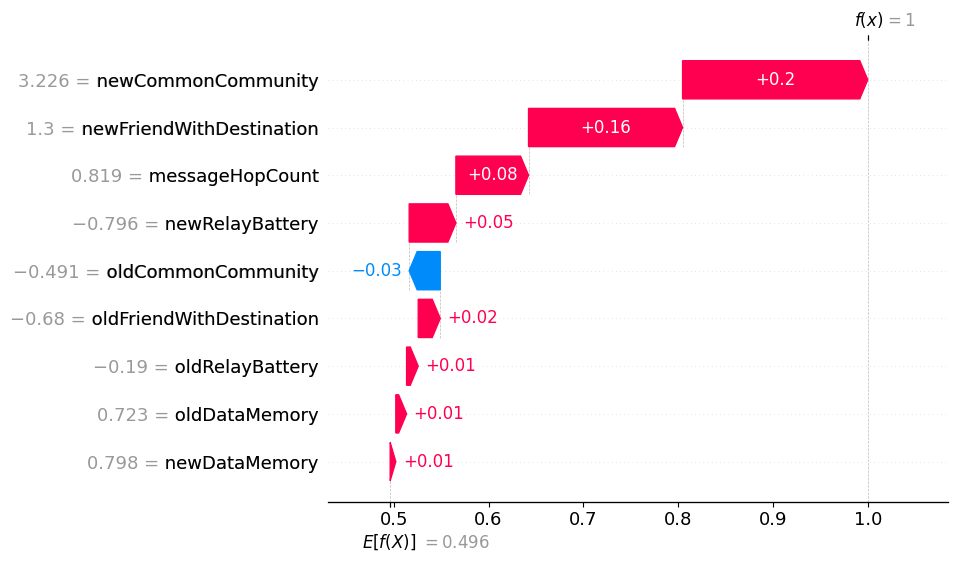

In [45]:

# desired_features = list(balanced_df.columns[:-1])
# for i in range(0, len(desired_features) - 1):
#     for j in range(i+1, len(desired_features)):
#         feature_indices = [i, j]
#         shap_values_subset = shap_values[:, feature_indices]
#         shap_values_subset
#         feat_subset = X_test[list(map(lambda f: desired_features[f], feature_indices))]
#         plt.figure()
#         shap.summary_plot(shap_values_subset, feat_subset, plot_type="bar")
#         display(plt.gcf())
idx = 78
print(y_pred[idx][0])
shap.plots.waterfall(explainer(X_test)[idx,:,y_pred[idx][0]])